<a href="https://colab.research.google.com/github/cku7808/DL-for-everyone2/blob/main/ML_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Logistic Classification**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow.compat.v1 as tf # 텐서플로우 버전 1 사용
tf.disable_v2_behavior()

tf.enable_eager_execution()

Instructions for updating:
non-resource variables are not supported in the long term


DATA 준비

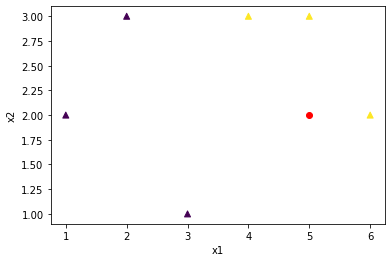

In [2]:
x_train = [[1.,2.],
           [2.,3.],
           [3.,1.],
           [4.,3.],
           [5.,3.],
           [6.,2.],]
y_train = [[0.],
           [0.],
           [0.],
           [1.],
           [1.],
           [1.]]

x_test = [[5.,2.]]
y_test = [[1.]]

x1 = [x[0] for x in x_train] # x좌표
x2 = [x[1] for x in x_train] # y좌표

colors = [int(y[0]%3) for y in y_train]

# plt.scatter : 산점도 그리기
# plt.scatter(x,y,s,c) -> x,y는 리스트, s는 사이즈, c는 색상
plt.scatter(x1,x2, c=colors, marker="^") # marker : 마커 모양
plt.scatter(x_test[0][0],x_test[0][1], c="red")

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

# 로지스틱 모델 구현

데이터 준비

In [3]:
# from_tensor_slices : numpy array로부터 tf.data.Dataset 을 생성, 입력된 텐서로부터 slices를 생성
# dataset.batch : 입력된 크기만큼 배치 만들기 -> 한번에 학습시킬 사이즈
dataset = tf.data.Dataset.from_tensor_slices((x_train,y_train)).batch(len(x_train))
print(dataset)

<BatchDataset element_spec=(TensorSpec(shape=(?, 2), dtype=tf.float32, name=None), TensorSpec(shape=(?, 1), dtype=tf.float32, name=None))>


가중치와 바이어스 값 부여

In [4]:
W = tf.Variable(tf.zeros([2,1]), name="weight") # 가중치
b = tf.Variable(tf.zeros([1]), name="bias") # 바이어스

가설 함수

$sigmoid(x) = \frac{1}{1+e^{-x}}$

In [5]:
def logistic_regression(features):
  hypothesis = tf.div(1., 1. + tf.exp(tf.matmul(features, W)+b))
  # tf.sigmoid(tf.matmul(X,W))

  return hypothesis

가설을 검증할 cost function 정의

$cost(h(x),y) = -log(h(x))\quad if \;\; y=1$


$cost(h(x),y) = -log(1-h(x))\quad if \;\; y=0$



---



$cost(h(x),y) = -ylog(h(x)) - (1-y)log(1-h(x))$

In [6]:
def loss_fn(hypothesis, features, labels):
  cost = -tf.reduce_mean(labels * tf.log(logistic_regression(features)) + (1 - labels) * tf.log(1-logistic_regression(features)))
  return cost

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

시그모이드 함수를 통해 예측값이 0.5보다 크면 1을 반환, 0.5보다 작으면 0 반환

In [7]:
def accuracy_fn(hypothesis, labels):
  predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32) # tf.cast : 텐서를 새로운 형태(data type)로 변환
  # 조건에 따라 True==1, False==0을 반환
  accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted,labels), dtype=tf.int32)) # tf.equal : 요소 별로 같은지 비교 후 True/False 반환 -> [True, False]
  # tf.reduce_mean : 차원을 제거하고 평균을 구함
  # 결과값(accuracy)이 1이면 예측값과 실제값이 동일한 것
  return accuracy

GradientTape를 통해 경사값 계산

In [8]:
def grad(hypothesis, features, labels): # 손실(loss, error) 계산
  with tf.GradientTape() as tape:
    loss_value = loss_fn(logistic_regression(features),features,labels)
  return tape.gradient(loss_value, [W,b])

# 학습 실행

In [9]:
# 학습
EPOCHS = 1001

for step in range(EPOCHS):
  for features, labels in dataset: # features == x_train, labels == y_train
    grads = grad(logistic_regression(features), features, labels)
    optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b])) # apply_gradient : gradient 값을 통해 W,b 값을 얻어냄
    if step % 100 == 0:
      print("iter: {}, Loss: {:.4f}".format(step, loss_fn(logistic_regression(features),features,labels)))

# 검증
test_acc = accuracy_fn(logistic_regression(x_test),y_test)
print("Testset Accuracy: {:.4f}".format(test_acc))

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
iter: 0, Loss: 0.6874
iter: 100, Loss: 0.5776
iter: 200, Loss: 0.5349
iter: 300, Loss: 0.5054
iter: 400, Loss: 0.4838
iter: 500, Loss: 0.4671
iter: 600, Loss: 0.4535
iter: 700, Loss: 0.4420
iter: 800, Loss: 0.4319
iter: 900, Loss: 0.4228
iter: 1000, Loss: 0.4144
Testset Accuracy: 1.0000
